# Link prediction - Exploration

In this notebook we will get you acquainted with the problem of link prediction. Roughly speaking, link prediction methods take a graph $G = (V, E)$ where the edge set $E$ is *incomplete*. The task of link prediction methods is then to point out likely missing edges from $E$. We will start looking at a simple graph where you probably see exactly where the missing links are.

**Exercise 1.** Write code to read the graph in the file ```graph_with_missing_links_1.gz```, and plot it. In this graph some arcs are missing. Try to identify by simply looking at the graph where arcs could be missing. What is the reason behing your choice?

20


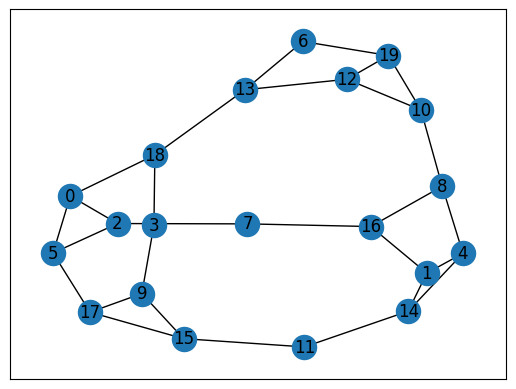

In [46]:
import networkx as nx
import matplotlib.pyplot as plt 

# The brackets are the nodes attributes 
G = nx.read_edgelist('datasets/graph_with_missing_links_1.gz')
# for node in G.nodes(): print(node,G.edges([node]))
print(len(G.nodes()))

nx.draw_networkx(G)
plt.show()
#Your answer goes here

**Exercise 2.** Write a function that puts your reasoning in previous question into practice. Ensure it outputs *one* edge that is most likely missing. Test your code on the previous graph. Does it output an edge you expected? If it did not: can you explain why?

In [41]:
def findMissingEdge(G):
     
    connection_dict,connection_scores = {},{}
    for node in G.nodes():
        connection_dict[node] = set([edge[1] for edge in G.edges([node])])

    all_nodes_set = set(G.nodes())
    for node1 in connection_dict.keys(): 
        node1_edges = connection_dict[node1]
        missing_connections = all_nodes_set.difference(node1_edges)
        for node2 in missing_connections: 
            edge_name = tuple([node1,node2])
            node2_edges = connection_dict[node2]
            if node1 != node2: connection_scores[edge_name] = len(node1_edges.intersection(node2_edges))


    max_score = max(connection_scores.values())
    sorted_scores = sorted(connection_scores.items(),key=lambda x: x[1])
    equal_results = {x[0]:x[1] for x in connection_scores.items() if x[1]>=max_score}
    return sorted_scores[-1],equal_results

    
print(findMissingEdge(G))

((('8', '4'), 11), {('4', '8'): 11, ('8', '4'): 11})


The method you have just found probably works well on the previous graph, because it is quite regular. Maybe you can even guess how we generated it. Of course, real-life networks are often less regular, meaning your method might not be well suited for other networks. Let us try your method on a network on a network that is less regular.

**Exercise 3.** Try your method on the graph in the file ```graph_with_missing_links_2.gz```. We reveal we have removed links $\{0, 5\}, \{0, 6\}$ and $\{0, 7\}$. Did your method output one of these edges?

In [42]:
G = nx.read_edgelist('datasets/graph_with_missing_links_2.gz')
print(findMissingEdge(G))


((('8', '4'), 11), {('4', '8'): 11, ('8', '4'): 11})


We reveal that the graph of the previous exercise was generated with a stochastic block model with parameters $\vec{n} = (15, 15)$ and $$P = \begin{pmatrix}
0.8 & 0.05 \\
   0.05  & 0.4
\end{pmatrix}.$$ Note that all removed edges were moving from a vertex of block 1 to another vertex of block 1.

**Exercise 4.** Look back at the edge your method outputted in Exercise 3. Does it connect vertices of the same blocks? If it does not, can you think of a reason why it does not. Adapt your method, so it is better suited for stochastic block models, and test it on the graph from Exercise 3. Ensure your improved method does *not* input $\vec{n}$ or $P$.

In [76]:
import numpy as np 

n = [15,15]
p = np.array([0.8,0.05,0.05,0.4])
p = np.reshape(p,(2,2))

def predictLinkSBM(G):
    connection_dict,connection_scores = {},{}
    for node in G.nodes():
        connection_dict[node] = set([edge[1] for edge in G.edges([node])])

    all_nodes_set = set(G.nodes())
    for node1 in connection_dict.keys(): 
        node1_edges = connection_dict[node1]
        missing_connections = all_nodes_set.difference(node1_edges)
        for node2 in missing_connections: 
            edge_name = tuple([node1,node2])
            node2_edges = connection_dict[node2]
            i = 0 if int(node1)<n[0] else 1 
            j = 0 if int(node2)<n[0] else 1 
            if node1 != node2: connection_scores[edge_name] = len(node1_edges.intersection(node2_edges)) * p[i,j]

    max_score = max(connection_scores.values())
    sorted_scores = sorted(connection_scores.items(),key=lambda x: x[1],reverse=True)
    equal_results = {x[0]:x[1] for x in connection_scores.items() if x[1]>=max_score}
    print(sorted_scores) 
    return sorted_scores[0],equal_results




In [77]:
G = nx.read_edgelist('datasets/graph_with_missing_links_2.gz')
print(predictLinkSBM(G))

[(('4', '8'), 8.8), (('8', '4'), 8.8), (('9', '14'), 8.0), (('12', '2'), 8.0), (('14', '9'), 8.0), (('14', '11'), 8.0), (('2', '12'), 8.0), (('11', '14'), 8.0), (('1', '5'), 7.2), (('4', '7'), 7.2), (('9', '13'), 7.2), (('13', '9'), 7.2), (('7', '4'), 7.2), (('5', '1'), 7.2), (('0', '2'), 6.4), (('1', '6'), 6.4), (('3', '5'), 6.4), (('3', '13'), 6.4), (('3', '11'), 6.4), (('8', '10'), 6.4), (('10', '8'), 6.4), (('12', '6'), 6.4), (('13', '7'), 6.4), (('13', '3'), 6.4), (('2', '0'), 6.4), (('7', '13'), 6.4), (('11', '3'), 6.4), (('5', '3'), 6.4), (('6', '12'), 6.4), (('6', '1'), 6.4), (('0', '5'), 5.6000000000000005), (('0', '11'), 5.6000000000000005), (('1', '10'), 5.6000000000000005), (('3', '6'), 5.6000000000000005), (('9', '10'), 5.6000000000000005), (('10', '12'), 5.6000000000000005), (('10', '1'), 5.6000000000000005), (('10', '9'), 5.6000000000000005), (('12', '10'), 5.6000000000000005), (('11', '0'), 5.6000000000000005), (('5', '0'), 5.6000000000000005), (('6', '3'), 5.6000000000

It is actually pretty weird that your methods only output *one* edge. In the examples before multiple edges were missing. In practice, you never know how many edges are missing. Moreover, it could be that the first edges your algorithm outputs is wrong while the subsequent ones are correct. Therefore, it makes more sense to give all edges a *score* (called its **reliability**) that measure how "ceartain" your can be this edge is missing from the graph.

**Exercise 5.** Rework your general and stochastic block model specific method to give each edge a reliability. Test your methods again on the two graphs. How high do the actual missing edges rank?

In [81]:
import numpy as np 

def findMissingEdgeReliable(G):
    n_nodes= len(G.nodes) 
    Adj = nx.to_numpy_array(G)
    reliabilityMatrix = np.zeros_like(Adj)
    connection_dict= {}

    for node in G.nodes():
        connection_dict[node] = set([edge[1] for edge in G.edges([node])])
    for key,value in connection_dict.items():
        for key2 in value: reliabilityMatrix[int(key),int(key2)] = 1

    all_nodes_set = set(G.nodes())
    for node1 in connection_dict.keys(): 
        node1_edges = connection_dict[node1]
        missing_connections = all_nodes_set.difference(node1_edges)
        for node2 in missing_connections: 
            node2_edges = connection_dict[node2]
            if node1 != node2: 
                reliabilityMatrix[int(node1),int(node2)] = len(node1_edges.intersection(node2_edges))/n_nodes
    
    return reliabilityMatrix

def predictLinkSBMReliable(G):
    n_nodes= len(G.nodes) 
    Adj = nx.to_numpy_array(G)
    reliabilityMatrix = np.zeros_like(Adj)
    connection_dict= {}

    for node in G.nodes():
        connection_dict[node] = set([edge[1] for edge in G.edges([node])])
    for key,value in connection_dict.items():
        for key2 in value: reliabilityMatrix[int(key),int(key2)] = 1

    all_nodes_set = set(G.nodes())
    for node1 in connection_dict.keys(): 
        node1_edges = connection_dict[node1]
        missing_connections = all_nodes_set.difference(node1_edges)
        for node2 in missing_connections: 
            node2_edges = connection_dict[node2]
            i = 0 if int(node1)<n[0] else 1 
            j = 0 if int(node2)<n[0] else 1 
            if node1 != node2:  reliabilityMatrix[int(node1),int(node2)] = (len(node1_edges.intersection(node2_edges)) * p[i,j]) / n_nodes
    
    return reliabilityMatrix

We end by testing your new methods on a real-life network. From this network we have removed edge $\{13, 33\}$ and $\{2, 3\}$.

**Exercise 6.** Load the graph ```graph_with_missing_links_3.gz```, and apply both your link prediction methods on this graph. Which method has performed better? Think of reasons why this method has performed better on this real-life network. Can you think of real-life networks where the other method might have been better?

In [82]:
G = nx.read_edgelist('datasets/graph_with_missing_links_3.gz')

print(f"STD method results:\n{findMissingEdgeReliable(G)}")
print(f"Relaiable SBM results:\n{predictLinkSBMReliable(G)}")

STD method results:
[[0.         1.         1.         ... 1.         0.08823529 0.08823529]
 [1.         0.         1.         ... 0.02941176 0.05882353 0.05882353]
 [1.         1.         0.         ... 0.08823529 1.         0.14705882]
 ...
 [1.         0.02941176 0.08823529 ... 0.         1.         1.        ]
 [0.08823529 0.05882353 1.         ... 1.         0.         1.        ]
 [0.08823529 0.05882353 0.14705882 ... 1.         1.         0.        ]]
Relaiable SBM results:
[[0.         1.         1.         ... 1.         0.00441176 0.00441176]
 [1.         0.         1.         ... 0.00147059 0.00294118 0.00294118]
 [1.         1.         0.         ... 0.00441176 1.         0.00735294]
 ...
 [1.         0.00147059 0.00441176 ... 0.         1.         1.        ]
 [0.00441176 0.00294118 1.         ... 1.         0.         1.        ]
 [0.00441176 0.00294118 0.00735294 ... 1.         1.         0.        ]]
